In [1]:
# PART III: DATA PREPARATION

# Import any necessary libraries & packages
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load dataset into pandas data frame
df = pd.read_csv(r'C:\Users\ashle\Downloads\Churn D208\churn_clean.csv',keep_default_na=False)

In [2]:
# Calculate total null values and total duplicate values in the dataset
total_nulls = df.isna().sum().sum()
total_dupes = df.duplicated().sum()

print(f"Total Nulls: {total_nulls}\nTotal Duplicate Records: {total_dupes}")

Total Nulls: 0
Total Duplicate Records: 0


In [3]:
# Check for the number of unique values in each column
df.nunique()

CaseOrder               10000
Customer_id             10000
Interaction             10000
UID                     10000
City                     6058
State                      52
County                   1620
Zip                      8583
Lat                      8563
Lng                      8630
Population               5933
Area                        3
TimeZone                   25
Job                       639
Children                   11
Age                        72
Income                   9993
Marital                     5
Gender                      3
Churn                       2
Outage_sec_perweek       9986
Email                      23
Contacts                    8
Yearly_equip_failure        6
Techie                      2
Contract                    3
Port_modem                  2
Tablet                      2
InternetService             3
Phone                       2
Multiple                    2
OnlineSecurity              2
OnlineBackup                2
DeviceProt

In [4]:
# Print the columns with less than 100 unique values
for col in df.columns:
    if df[col].nunique()<100:
        print(col, sorted(df[col].unique()), '\n')

State ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'] 

Area ['Rural', 'Suburban', 'Urban'] 

TimeZone ['America/Anchorage', 'America/Boise', 'America/Chicago', 'America/Denver', 'America/Detroit', 'America/Indiana/Indianapolis', 'America/Indiana/Knox', 'America/Indiana/Marengo', 'America/Indiana/Petersburg', 'America/Indiana/Tell_City', 'America/Indiana/Vincennes', 'America/Indiana/Winamac', 'America/Juneau', 'America/Kentucky/Louisville', 'America/Los_Angeles', 'America/Menominee', 'America/New_York', 'America/Nome', 'America/North_Dakota/New_Salem', 'America/Ojinaga', 'America/Phoenix', 'America/Puerto_Rico', 'America/Sitka', 'America/Toronto', 'Pacific/Honolulu'] 

Children [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

Age [18, 19

In [5]:
# Drop columns that are unnecessary for the analysis
to_drop = ['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip',
           'Lat','Lng','Population','Area','TimeZone','Marital','Job', 'Techie','PaperlessBilling',
           'PaymentMethod','Item1','Item2','Item3', 'Item4','Item5','Item6','Item7',
           'Item8']
df.drop(columns=to_drop,inplace=True)

df.head()

,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Contract,...,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0,68,28561.99,Male,No,7.978323,10,0,1,One year,...,No,Yes,Yes,No,No,No,Yes,6.795513,172.455519,904.536110
1,1,27,21704.77,Female,Yes,11.699080,12,0,1,Month-to-month,...,Yes,Yes,No,No,No,Yes,Yes,1.156681,242.632554,800.982766
2,4,50,9609.57,Female,No,10.752800,9,0,1,Two Year,...,Yes,No,No,No,No,No,Yes,15.754144,159.947583,2054.706961
3,1,48,18925.23,Male,No,14.913540,15,2,0,Two Year,...,No,Yes,No,No,No,Yes,No,17.087227,119.956840,2164.579412
4,0,83,40074.19,Male,Yes,8.147417,16,2,1,Month-to-month,...,No,No,No,No,Yes,Yes,No,1.670972,149.948316,271.493436


df.columns

In [6]:
# Find the summary statistics for numerical variables
df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [7]:
# Create a list of the categorical variables
cat_cols = ['Gender','Churn','Contract','Port_modem','Tablet',
            'InternetService','Phone','Multiple','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
            
print('PROPORTION OF EACH CATEGORICAL VARIABLE')
for col in cat_cols:
    freq = df[col].value_counts(normalize=True).reset_index()
    freq.columns = [f'{col}','Proportion']
    print('-'*40+'\n',freq)

PROPORTION OF EACH CATEGORICAL VARIABLE
----------------------------------------
       Gender  Proportion
0     Female      0.5025
1       Male      0.4744
2  Nonbinary      0.0231
----------------------------------------
   Churn  Proportion
0    No       0.735
1   Yes       0.265
----------------------------------------
          Contract  Proportion
0  Month-to-month      0.5456
1        Two Year      0.2442
2        One year      0.2102
----------------------------------------
   Port_modem  Proportion
0         No      0.5166
1        Yes      0.4834
----------------------------------------
   Tablet  Proportion
0     No      0.7009
1    Yes      0.2991
----------------------------------------
   InternetService  Proportion
0     Fiber Optic      0.4408
1             DSL      0.3463
2            None      0.2129
----------------------------------------
   Phone  Proportion
0   Yes      0.9067
1    No      0.0933
----------------------------------------
   Multiple  Proportion
0  

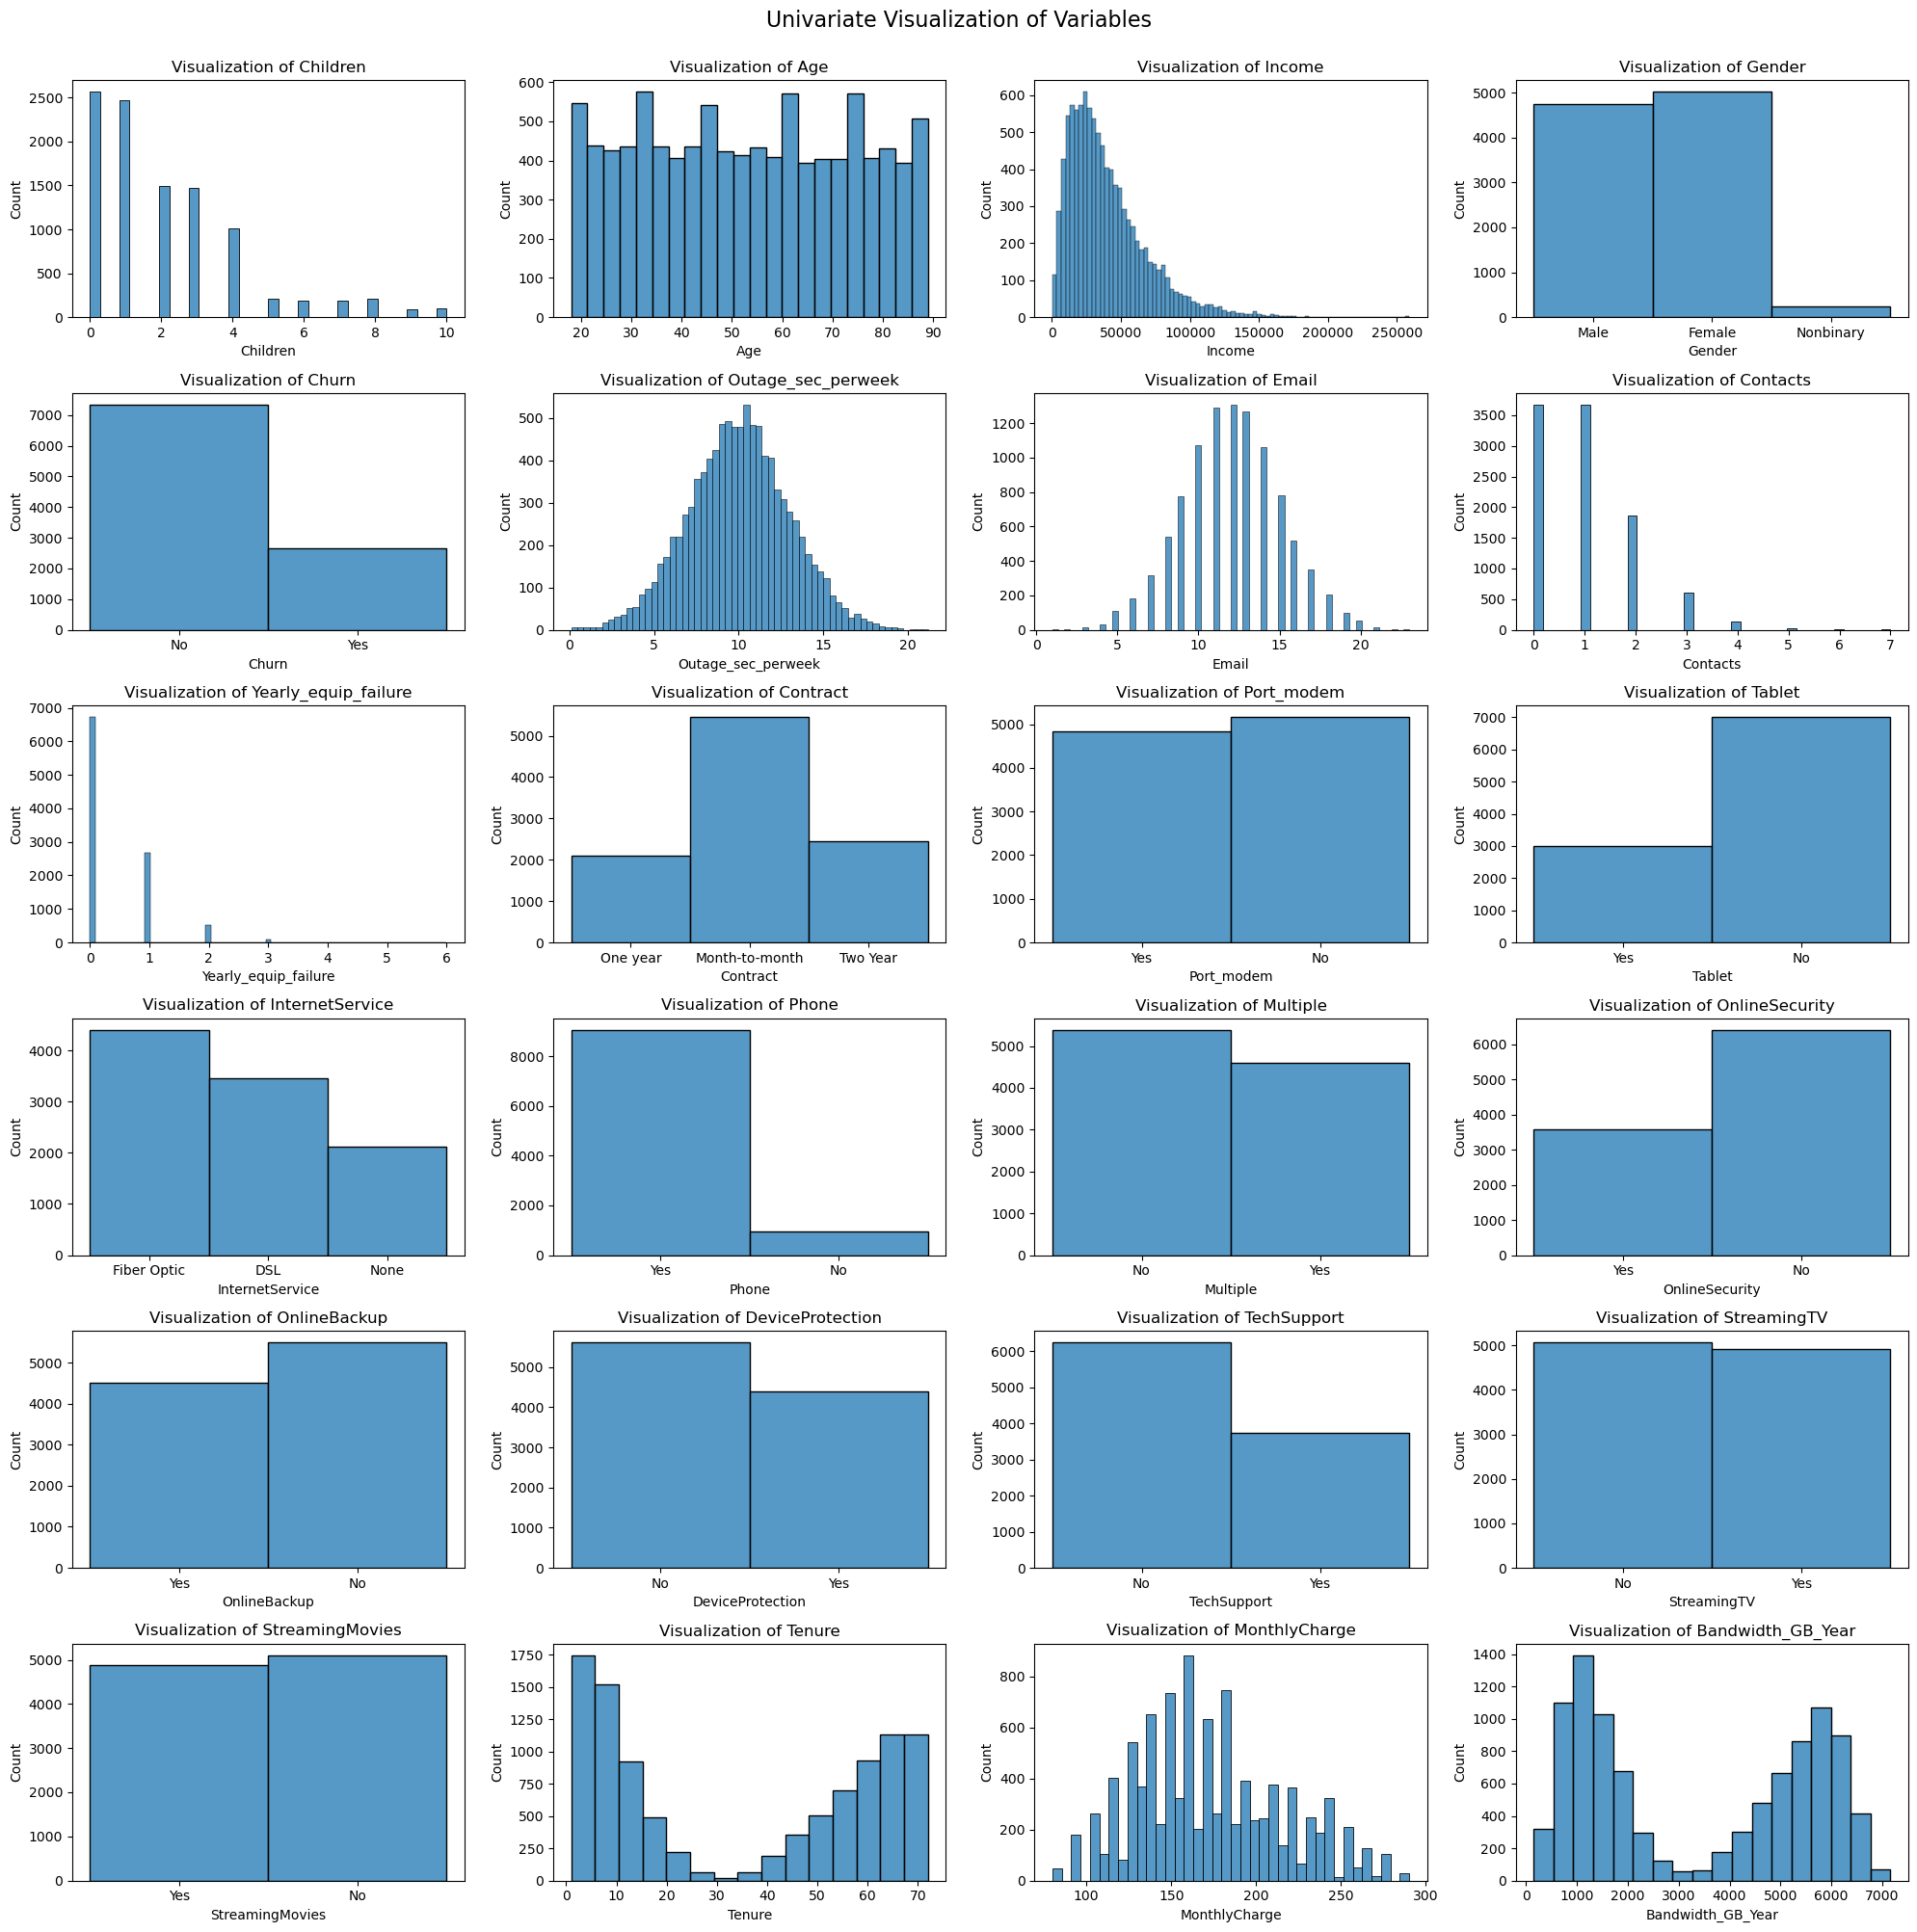

In [8]:
# Display the univariate visualization for all independent (predicting) variables and dependent (target) variable
fig_rows, fig_cols = (6, 4)
fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(20, 20))
i = 0
for row in range(fig_rows):
    for col in range(fig_cols):
        try:
            sns.histplot(data=df, x=df.columns[i], ax=axes[row][col])
            axes[row][col].set_title(f"Visualization of {df.columns[i]}")
            i += 1
        except IndexError:
            break
plt.suptitle("Univariate Visualization of Variables", fontsize=16, y=1)
plt.tight_layout()
plt.show()

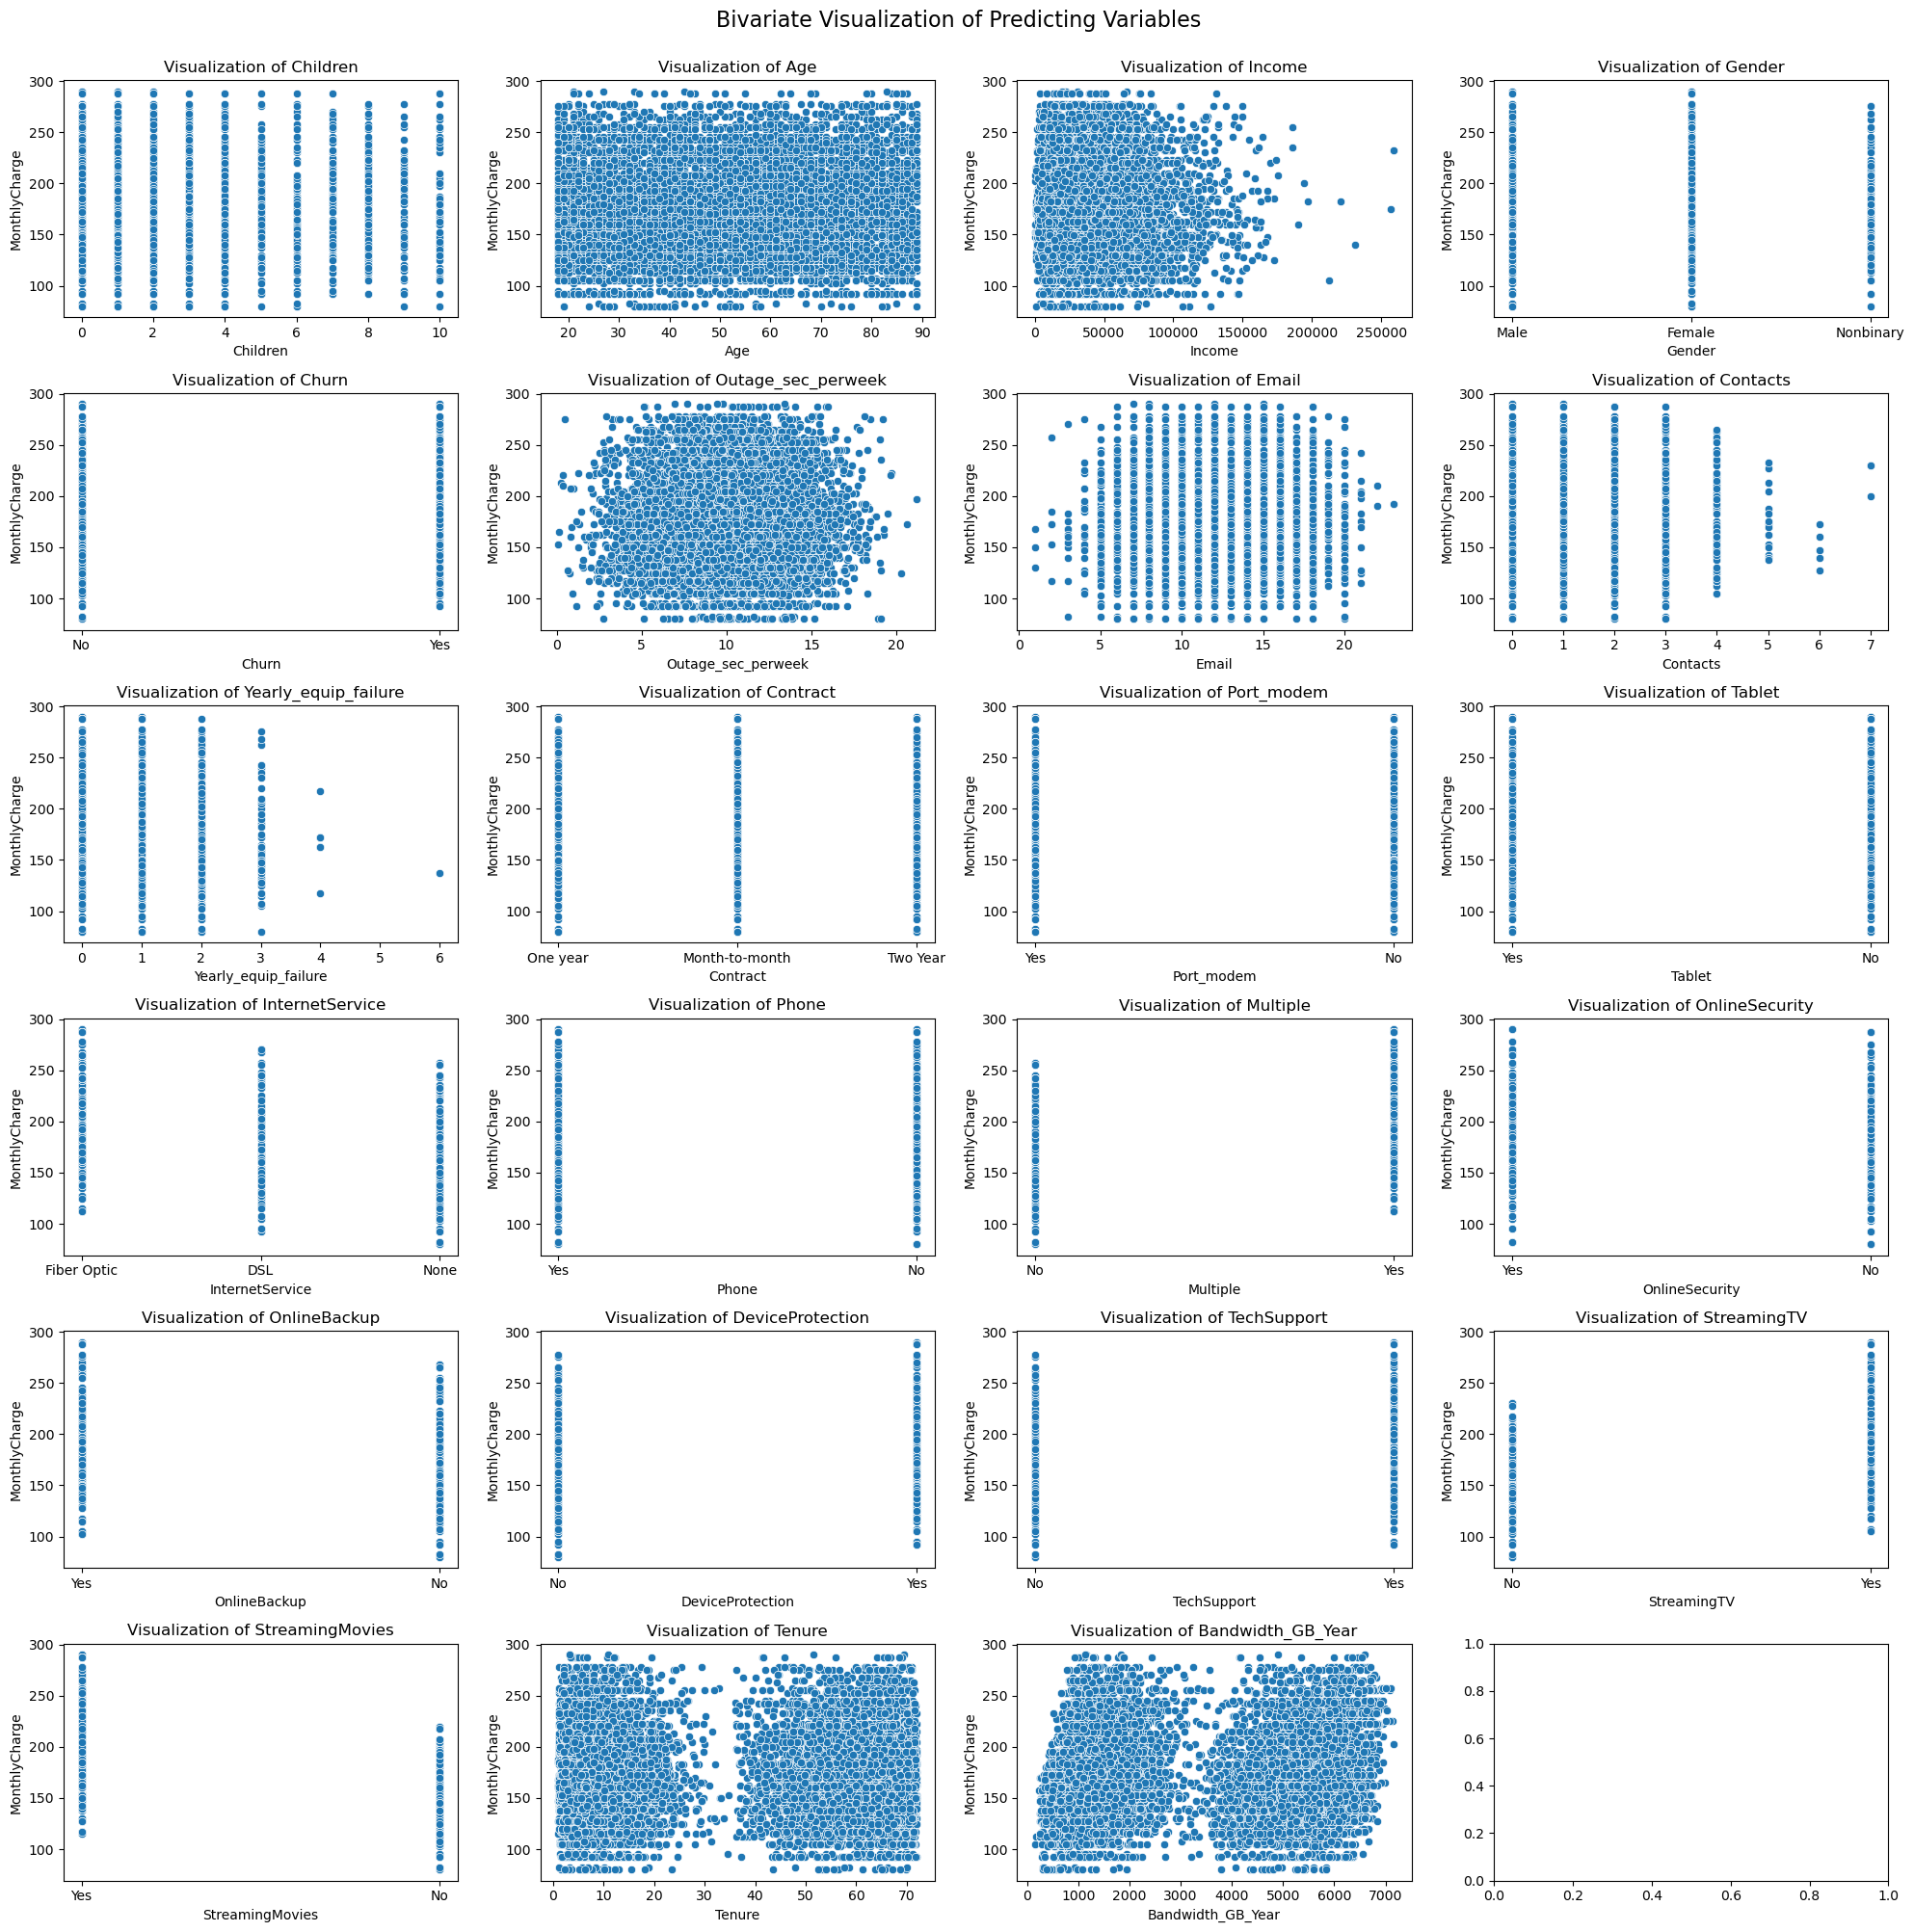

In [9]:
# Create scatterplots to show the bivariate visualization of independent variables
fig_rows, fig_cols = (6, 4)
fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(20, 20))
cols = list(filter(lambda x: x != "MonthlyCharge", df.columns))
i = 0
for row in range(fig_rows):
    for col in range(fig_cols):
        try:
            sns.scatterplot(data=df, x=cols[i], y="MonthlyCharge", ax=axes[row][col])
            axes[row][col].set_title(f"Visualization of {cols[i]}")
            i += 1
        except IndexError:
            break

plt.suptitle("Bivariate Visualization of Predicting Variables", fontsize=16, y=1)
plt.tight_layout()
plt.show()

In [10]:
# Reformat the columns to have 3 decimal places
df['Outage_sec_perweek'] = df.Outage_sec_perweek.round(3)
df['MonthlyCharge'] = df.MonthlyCharge.round(3)
df['Bandwidth_GB_Year'] = df.Bandwidth_GB_Year.round(3)
df['Tenure'] = df.Tenure.round(3)


# Create dummy variables where "Yes" is represented by 1 & "No" is represented by 0
df['DummyGender'] = [1 if v == 'Male' else 0 for v in df['Gender']]
df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in df['Churn']]
df['DummyContract'] = [1 if v == 'Two Year' else 0 for v in df['Contract']]
df['DummyPort_modem'] = [1 if v == 'Yes' else 0 for v in df['Port_modem']]
df['DummyTablet'] = [1 if v == 'Yes' else 0 for v in df['Tablet']]
df['DummyInternetService'] = [1 if v == 'Fiber Optic' else 0 for v in df['InternetService']]
df['DummyPhone'] = [1 if v == 'Yes' else 0 for v in df['Phone']]
df['DummyMultiple'] = [1 if v == 'Yes' else 0 for v in df['Multiple']]
df['DummyOnlineSecurity'] = [1 if v == 'Yes' else 0 for v in df['OnlineSecurity']]
df['DummyOnlineBackup'] = [1 if v == 'Yes' else 0 for v in df['OnlineBackup']]
df['DummyDeviceProtection'] = [1 if v == 'Yes' else 0 for v in df['DeviceProtection']]
df['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in df['TechSupport']]
df['DummyStreamingTV'] = [1 if v == 'Yes' else 0 for v in df['StreamingTV']]
df['DummyStreamingMovies'] = [1 if v == 'Yes' else 0 for v in df['StreamingMovies']]

In [11]:
# Drop the original categorical columns
df = df.drop(columns=['Gender','Churn','Contract','Port_modem','Tablet','InternetService','Phone','Multiple',
                      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])

# Check the new data frame
df

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DummyTablet,DummyInternetService,DummyPhone,DummyMultiple,DummyOnlineSecurity,DummyOnlineBackup,DummyDeviceProtection,DummyTechSupport,DummyStreamingTV,DummyStreamingMovies
0,0,68,28561.99,7.978,10,0,1,6.796,172.456,904.536,...,1,1,1,0,1,1,0,0,0,1
1,1,27,21704.77,11.699,12,0,1,1.157,242.633,800.983,...,1,1,1,1,1,0,0,0,1,1
2,4,50,9609.57,10.753,9,0,1,15.754,159.948,2054.707,...,0,0,1,1,0,0,0,0,0,1
3,1,48,18925.23,14.914,15,2,0,17.087,119.957,2164.579,...,0,0,1,0,1,0,0,0,1,0
4,0,83,40074.19,8.147,16,2,1,1.671,149.948,271.493,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723.74,9.416,12,2,0,68.197,159.979,6511.253,...,1,0,1,1,0,1,1,0,0,0
9996,4,48,34129.34,6.741,15,2,0,61.040,207.481,5695.952,...,0,1,1,1,1,1,1,0,1,0
9997,1,48,45983.43,6.591,10,0,0,47.417,169.974,4159.306,...,0,1,1,1,1,1,0,0,0,0
9998,1,39,16667.58,12.072,14,1,0,71.096,252.624,6468.457,...,1,1,0,1,0,0,0,1,1,1


,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DummyTablet,DummyInternetService,DummyPhone,DummyMultiple,DummyOnlineSecurity,DummyOnlineBackup,DummyDeviceProtection,DummyTechSupport,DummyStreamingTV,DummyStreamingMovies
Children,1.000000,-0.029732,0.009942,0.001887,0.004479,-0.020776,0.007321,-0.005091,-0.009781,0.025585,...,0.001494,-0.003150,-0.001629,-0.021969,0.006937,-0.000297,0.005477,0.000878,-0.007106,0.003461
Age,-0.029732,1.000000,-0.004091,-0.008046,0.001588,0.015068,0.008577,0.016979,0.010728,-0.014724,...,-0.004384,0.001240,0.009521,-0.004674,-0.011213,0.003309,0.014489,0.017155,-0.000197,0.010125
Income,0.009942,-0.004091,1.000000,-0.010009,-0.009267,0.001233,0.005423,0.002114,-0.003014,0.003674,...,0.005999,-0.016990,-0.001677,-0.000214,-0.010385,-0.005974,0.014073,0.008835,-0.003324,-0.002186
Outage_sec_perweek,0.001887,-0.008046,-0.010009,1.000000,0.003994,0.015092,0.002910,0.002931,0.020496,0.004175,...,0.005614,0.004551,-0.010270,0.012142,-0.002414,0.000456,0.022008,-0.013221,0.008953,0.018086
Email,0.004479,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,-0.014468,0.001996,-0.014579,...,-0.008579,0.002827,-0.007281,-0.002966,-0.024908,-0.011763,0.001520,0.022119,0.005099,0.000711
Contacts,-0.020776,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032,0.002820,0.004259,0.003299,...,-0.011855,0.003987,0.005422,-0.016090,0.010922,0.010398,0.000497,-0.013009,0.000524,0.011002
Yearly_equip_failure,0.007321,0.008577,0.005423,0.002910,-0.016354,-0.006032,1.000000,0.012435,-0.007172,0.012034,...,0.003634,-0.004556,-0.007929,0.002213,-0.016486,-0.011500,-0.005903,0.003735,0.002597,-0.004473
Tenure,-0.005091,0.016979,0.002114,0.002931,-0.014468,0.002820,0.012435,1.000000,-0.003337,0.991495,...,0.000545,-0.003820,0.003256,-0.010422,0.002508,0.020802,-0.028113,-0.001377,0.002439,-0.002574
MonthlyCharge,-0.009781,0.010728,-0.003014,0.020496,0.001996,0.004259,-0.007172,-0.003337,1.000000,0.060406,...,0.007280,0.286602,-0.018977,0.385979,0.047735,0.259440,0.162735,0.120301,0.482312,0.608115
Bandwidth_GB_Year,0.025585,-0.014724,0.003674,0.004175,-0.014579,0.003299,0.012034,0.991495,0.060406,1.000000,...,0.002129,-0.061956,0.001332,0.006823,0.021006,0.041740,-0.007856,0.000120,0.054314,0.045600


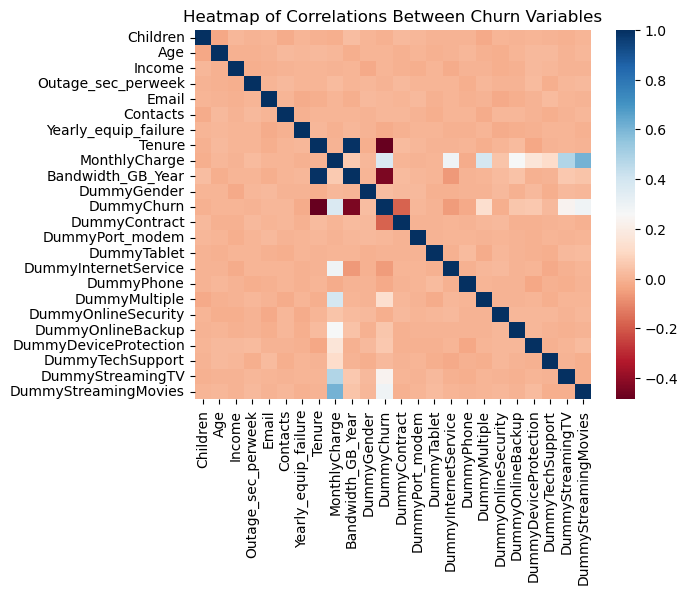

In [12]:
# Check for multicollinearity by calculating the correlation matrix
corr = df.corr()
display(corr)

# Plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')
plt.title("Heatmap of Correlations Between Churn Variables")
plt.show()

In [13]:
# Extract the cleaned & wrangled dataset
df.to_csv('df_clean.csv', index=False)

In [14]:
# PART IV: INITIAL LINEAR REGRESSION MODEL

# Load dataset into pandas data frame
df = pd.read_csv(r'C:\Users\ashle\Downloads\Churn D208\df_clean.csv',keep_default_na=False)

In [15]:
# Set the dependent variable
y = df.MonthlyCharge

# Set the multiple independent variables
X = df[['Children','Age','Income','DummyGender','DummyChurn','Outage_sec_perweek','Email',
        'Contacts','Yearly_equip_failure','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport',
        'DummyStreamingTV','DummyStreamingMovies','Tenure','Bandwidth_GB_Year']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.254e+04
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:35:05   Log-Likelihood:                -34795.
No. Observations:               10000   AIC:                         6.964e+04
Df Residuals:                    9976   BIC:                         6.981e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Children                 -1.18

In [16]:
# Calculate the residual standard error of the initial model
results.resid.std(ddof=X.shape[1])

7.860016205216757

In [17]:
# BEGINNING MODEL REDUCTION: VARIANCE INFLATION FACTOR

# Check VIF to see which variables should be eliminated due to high multicollinearity (greater than 10)
X = df[['Children','Age','Income','DummyGender','DummyChurn','Outage_sec_perweek','Email',
        'Contacts','Yearly_equip_failure','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport',
        'DummyStreamingTV','DummyStreamingMovies','Tenure','Bandwidth_GB_Year']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  feature         VIF
0                Children    2.310524
1                     Age    7.623725
2                  Income    2.898617
3             DummyGender    1.998025
4              DummyChurn    2.402915
5      Outage_sec_perweek   10.235182
6                   Email   12.771315
7                Contacts    1.994280
8    Yearly_equip_failure    1.383932
9           DummyContract    1.386305
10        DummyPort_modem    1.917305
11            DummyTablet    1.422244
12   DummyInternetService    2.781182
13             DummyPhone    9.064321
14          DummyMultiple    2.014248
15    DummyOnlineSecurity    1.661773
16      DummyOnlineBackup    1.997840
17  DummyDeviceProtection    1.917637
18       DummyTechSupport    1.595040
19       DummyStreamingTV    3.132889
20   DummyStreamingMovies    3.033774
21                 Tenure  515.355588
22      Bandwidth_GB_Year  641.076704


In [18]:
# Run the model after the removal of "Bandwidth_GB_Year" since it had the highest VIF (641.08)
X = df[['Children','Age','Income','DummyGender','DummyChurn','Outage_sec_perweek','Email',
        'Contacts','Yearly_equip_failure','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport',
        'DummyStreamingTV','DummyStreamingMovies','Tenure']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  feature        VIF
0                Children   1.916252
1                     Age   6.799938
2                  Income   2.883498
3             DummyGender   1.887488
4              DummyChurn   2.348930
5      Outage_sec_perweek  10.052666
6                   Email  12.343951
7                Contacts   1.989300
8    Yearly_equip_failure   1.382545
9           DummyContract   1.381484
10        DummyPort_modem   1.915861
11            DummyTablet   1.421552
12   DummyInternetService   1.773287
13             DummyPhone   8.905507
14          DummyMultiple   1.890460
15    DummyOnlineSecurity   1.543857
16      DummyOnlineBackup   1.811583
17  DummyDeviceProtection   1.773305
18       DummyTechSupport   1.591376
19       DummyStreamingTV   2.147044
20   DummyStreamingMovies   2.236238
21                 Tenure   3.651220


In [19]:
# Run the model after the removal of "Email" since it had the highest VIF (12.34)
# Make sure there are no VIF greater than 10 left in the analysis
X = df[['Children','Age','Income','DummyGender','DummyChurn','Outage_sec_perweek',
        'Contacts','Yearly_equip_failure','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport',
        'DummyStreamingTV','DummyStreamingMovies','Tenure']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  feature       VIF
0                Children  1.902115
1                     Age  6.507218
2                  Income  2.848951
3             DummyGender  1.875468
4              DummyChurn  2.335753
5      Outage_sec_perweek  9.201979
6                Contacts  1.978436
7    Yearly_equip_failure  1.380891
8           DummyContract  1.377260
9         DummyPort_modem  1.903208
10            DummyTablet  1.419423
11   DummyInternetService  1.761502
12             DummyPhone  8.280038
13          DummyMultiple  1.884228
14    DummyOnlineSecurity  1.542077
15      DummyOnlineBackup  1.806320
16  DummyDeviceProtection  1.766427
17       DummyTechSupport  1.580299
18       DummyStreamingTV  2.140258
19   DummyStreamingMovies  2.233176
20                 Tenure  3.604032


In [20]:
# Normalize the data
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df), columns=df.columns)
df_minmax

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DummyTablet,DummyInternetService,DummyPhone,DummyMultiple,DummyOnlineSecurity,DummyOnlineBackup,DummyDeviceProtection,DummyTechSupport,DummyStreamingTV,DummyStreamingMovies
0,0.0,0.704225,0.109120,0.373241,0.409091,0.000000,0.166667,0.081624,0.439987,0.106951,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.1,0.126761,0.082599,0.549533,0.500000,0.000000,0.166667,0.002203,0.773876,0.092165,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.4,0.450704,0.035818,0.504714,0.363636,0.000000,0.166667,0.207804,0.380477,0.271180,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.1,0.422535,0.071848,0.701852,0.636364,0.285714,0.000000,0.226580,0.190207,0.286868,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.915493,0.153646,0.381248,0.681818,0.285714,0.166667,0.009447,0.332899,0.016561,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.3,0.070423,0.214174,0.441370,0.500000,0.285714,0.000000,0.946448,0.380624,0.907513,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
9996,0.4,0.422535,0.130653,0.314635,0.636364,0.285714,0.000000,0.845647,0.606630,0.791099,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
9997,0.1,0.422535,0.176501,0.307528,0.409091,0.000000,0.000000,0.653764,0.428179,0.571687,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
9998,0.1,0.295775,0.063117,0.567205,0.590909,0.142857,0.000000,0.987272,0.821411,0.901403,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [21]:
# MODEL REDUCTION: BACKWARD STEPWISE ELIMINATION

# Perform backward stepwise elimination by removing highest p-value above 0.05 
y = df_minmax.MonthlyCharge
X = df_minmax[['Children','Age','Income','DummyGender','DummyChurn','Outage_sec_perweek',
        'Contacts','Yearly_equip_failure','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport',
        'DummyStreamingTV','DummyStreamingMovies','Tenure']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     8591.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:35:06   Log-Likelihood:                 16436.
No. Observations:               10000   AIC:                        -3.283e+04
Df Residuals:                    9978   BIC:                        -3.267e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Children                 -0.00

In [22]:
# Run the model after the removal of "Children" since it had the highest p-value (0.954)
y = df_minmax.MonthlyCharge
X = df_minmax[['Age','Income','DummyGender','DummyChurn','Outage_sec_perweek',
        'Contacts','Yearly_equip_failure','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport',
        'DummyStreamingTV','DummyStreamingMovies','Tenure']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     9022.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:35:06   Log-Likelihood:                 16436.
No. Observations:               10000   AIC:                        -3.283e+04
Df Residuals:                    9979   BIC:                        -3.268e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                       0.00

In [23]:
# Run the model after the removal of "Contacts" since it had the highest p-value (0.823)
y = df_minmax.MonthlyCharge
X = df_minmax[['Age','Income','DummyGender','DummyChurn','Outage_sec_perweek',
        'Yearly_equip_failure','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport',
        'DummyStreamingTV','DummyStreamingMovies','Tenure']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     9497.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:35:06   Log-Likelihood:                 16436.
No. Observations:               10000   AIC:                        -3.283e+04
Df Residuals:                    9980   BIC:                        -3.269e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                       0.00

In [24]:
# Run the model after the removal of "Age" since it had the highest p-value (0.771)
y = df_minmax.MonthlyCharge
X = df_minmax[['Income','DummyGender','DummyChurn','Outage_sec_perweek',
        'Yearly_equip_failure','DummyContract','DummyPort_modem','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport',
        'DummyStreamingTV','DummyStreamingMovies','Tenure']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.003e+04
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:35:06   Log-Likelihood:                 16436.
No. Observations:               10000   AIC:                        -3.283e+04
Df Residuals:                    9981   BIC:                        -3.270e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [25]:
# Run the model after the removal of "Yearly_equip_failure" since it had the highest p-value (0.685)
y = df_minmax.MonthlyCharge
X = df_minmax[['Income','DummyGender','DummyChurn','Outage_sec_perweek',
        'DummyPort_modem','DummyContract','DummyTablet','DummyInternetService',
        'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport',
        'DummyStreamingTV','DummyStreamingMovies','Tenure']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 1.062e+04
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:35:06   Log-Likelihood:                 16435.
No. Observations:               10000   AIC:                        -3.283e+04
Df Residuals:                    9982   BIC:                        -3.271e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [26]:
# Run the model after the removal of "DummyTablet" since it had the highest p-value (0.463)
y = df_minmax.MonthlyCharge
X = df_minmax[['Income','DummyGender','DummyChurn','Outage_sec_perweek','DummyPort_modem','DummyContract',
               'DummyInternetService','DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup',
               'DummyDeviceProtection','DummyTechSupport','DummyStreamingTV','DummyStreamingMovies','Tenure']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 1.128e+04
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:35:06   Log-Likelihood:                 16435.
No. Observations:               10000   AIC:                        -3.284e+04
Df Residuals:                    9983   BIC:                        -3.271e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [27]:
# Run the model after the removal of "Outage_sec_perweek" since it had the highest p-value (0.405)
y = df_minmax.MonthlyCharge
X = df_minmax[['Income','DummyGender','DummyChurn','DummyPort_modem','DummyContract','DummyInternetService',
               'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection',
               'DummyTechSupport','DummyStreamingTV','DummyStreamingMovies','Tenure']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 1.203e+04
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:35:06   Log-Likelihood:                 16435.
No. Observations:               10000   AIC:                        -3.284e+04
Df Residuals:                    9984   BIC:                        -3.272e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [28]:
# Run the model after the removal of "DummyGender" since it had the highest p-value (0.256)
y = df_minmax.MonthlyCharge
X = df_minmax[['Income','DummyChurn','DummyPort_modem','DummyContract','DummyInternetService',
               'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection',
               'DummyTechSupport','DummyStreamingTV','DummyStreamingMovies','Tenure']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 1.289e+04
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:35:06   Log-Likelihood:                 16434.
No. Observations:               10000   AIC:                        -3.284e+04
Df Residuals:                    9985   BIC:                        -3.273e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [29]:
# Run the model after the removal of "Income" since it had the highest p-value (0.17)
y = df_minmax.MonthlyCharge
X = df_minmax[['DummyChurn','DummyPort_modem','DummyContract','DummyInternetService',
               'DummyPhone','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup','DummyDeviceProtection',
               'DummyTechSupport','DummyStreamingTV','DummyStreamingMovies','Tenure']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.388e+04
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:35:06   Log-Likelihood:                 16433.
No. Observations:               10000   AIC:                        -3.284e+04
Df Residuals:                    9986   BIC:                        -3.274e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
DummyChurn                0.02

In [30]:
# Run the model after the removal of "DummyPort_modem" since it had the highest p-value (0.14)
y = df_minmax.MonthlyCharge
X = df_minmax[['DummyChurn','DummyContract','DummyInternetService','DummyPhone','DummyMultiple','DummyOnlineSecurity',
               'DummyOnlineBackup','DummyDeviceProtection','DummyTechSupport','DummyStreamingTV','DummyStreamingMovies',
               'Tenure']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.504e+04
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:35:06   Log-Likelihood:                 16432.
No. Observations:               10000   AIC:                        -3.284e+04
Df Residuals:                    9987   BIC:                        -3.274e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
DummyChurn                0.02

In [31]:
# Run the model after the removal of "DummyPhone" since it had the highest p-value (0.137)
y = df_minmax.MonthlyCharge
X = df_minmax[['DummyChurn','DummyContract','DummyInternetService','DummyMultiple','DummyOnlineSecurity','DummyOnlineBackup',
               'DummyDeviceProtection','DummyTechSupport','DummyStreamingTV','DummyStreamingMovies','Tenure']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# This is the final reduced model

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.640e+04
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:35:06   Log-Likelihood:                 16431.
No. Observations:               10000   AIC:                        -3.284e+04
Df Residuals:                    9988   BIC:                        -3.275e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
DummyChurn                0.02

In [32]:
# Calculate the residual standard error of the final reduced model
results.resid.std(ddof=X.shape[1])

0.0468201691404279

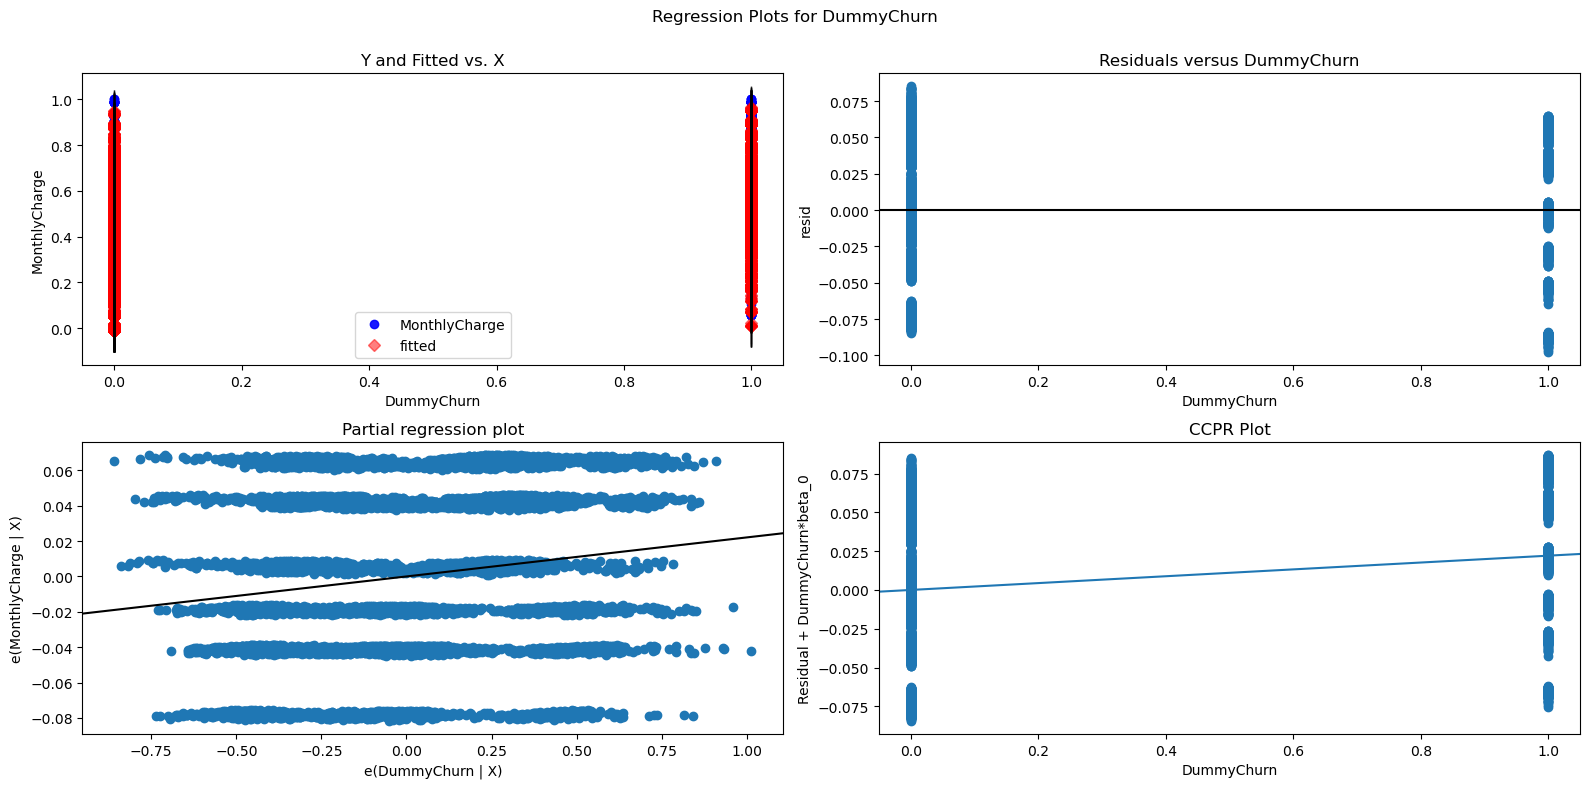

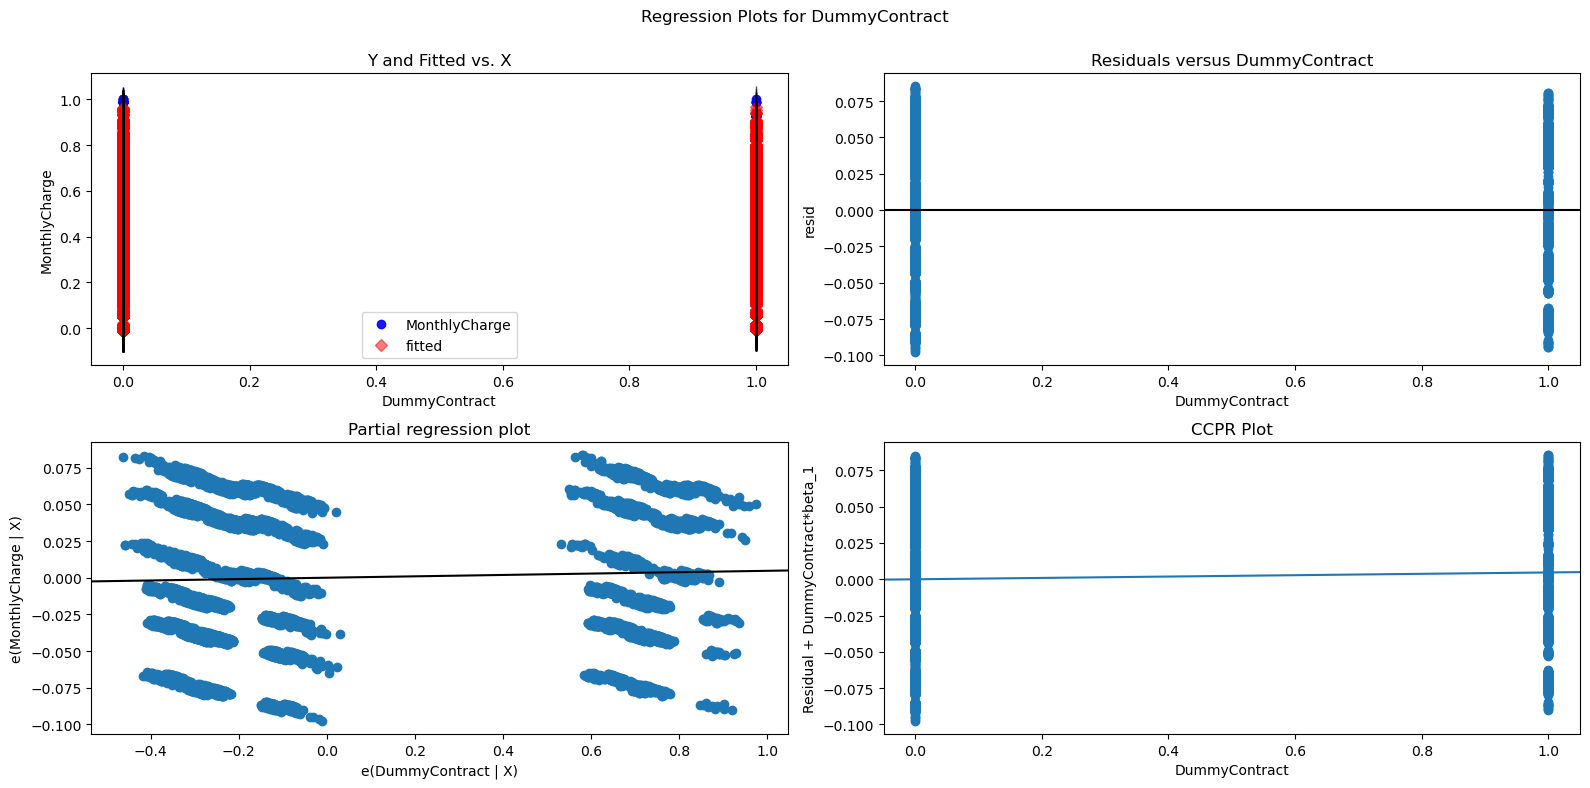

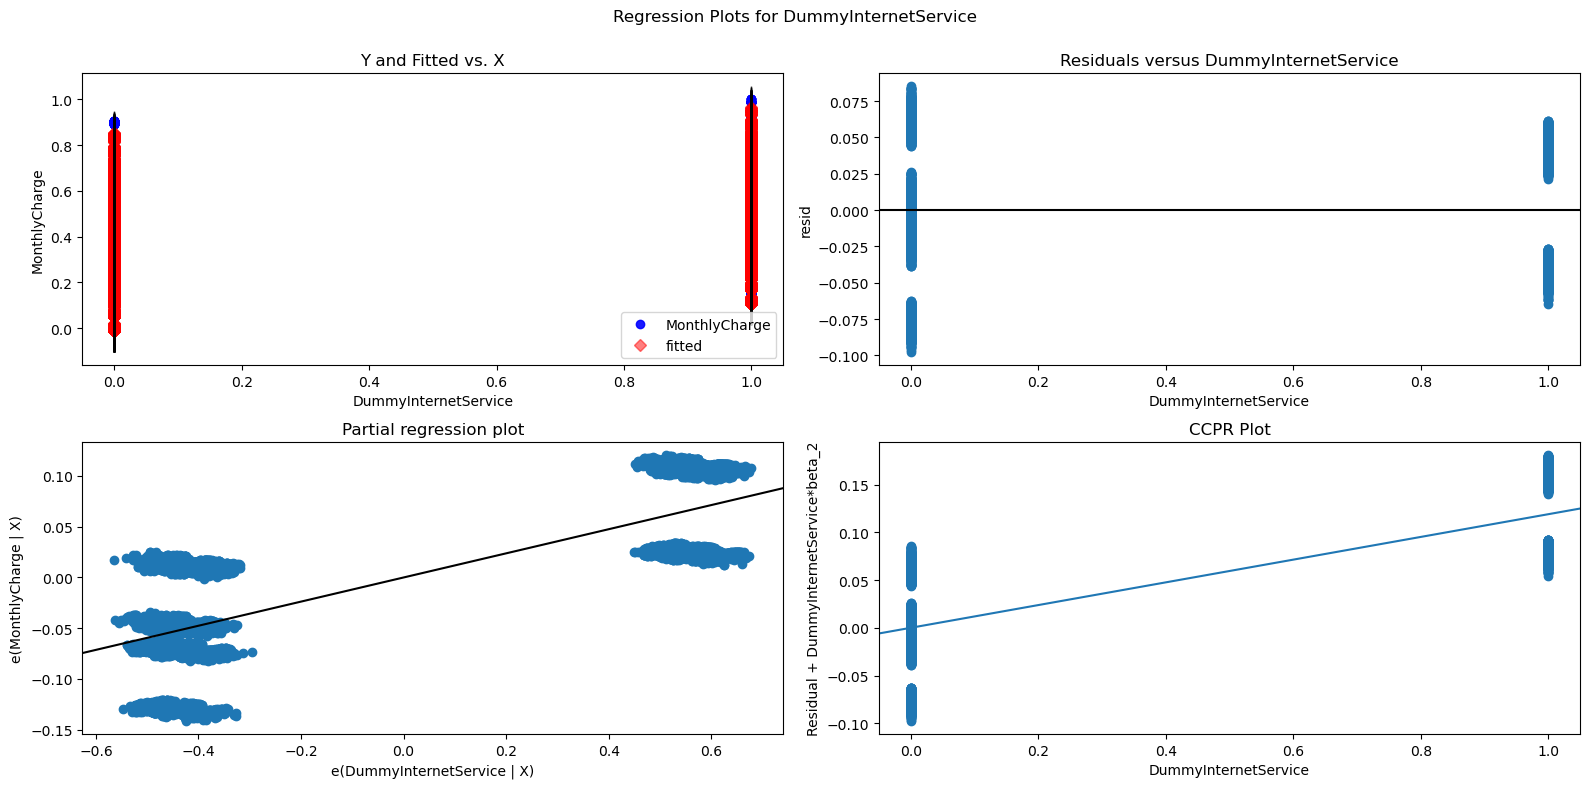

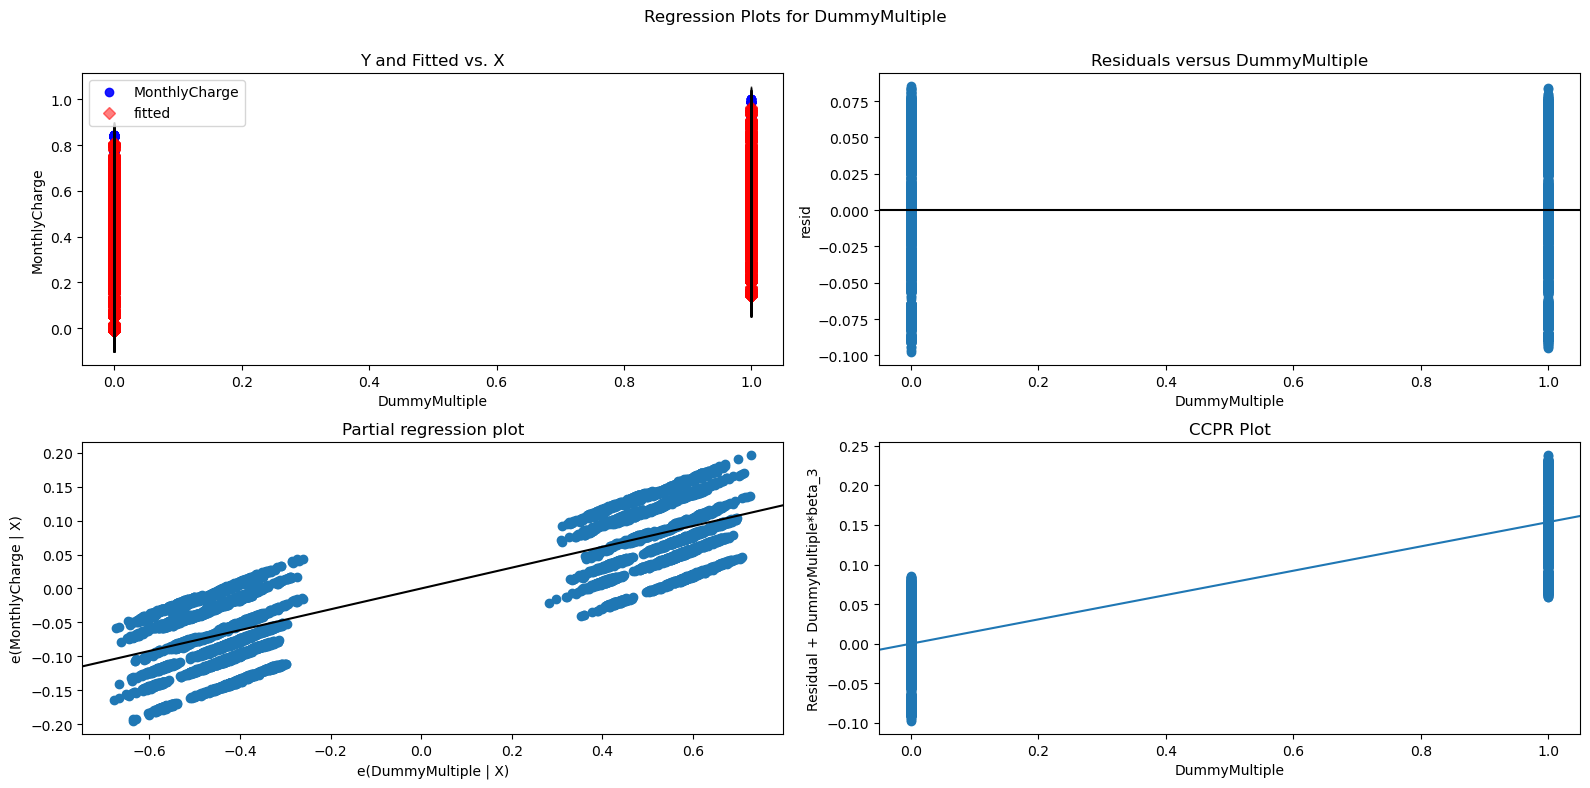

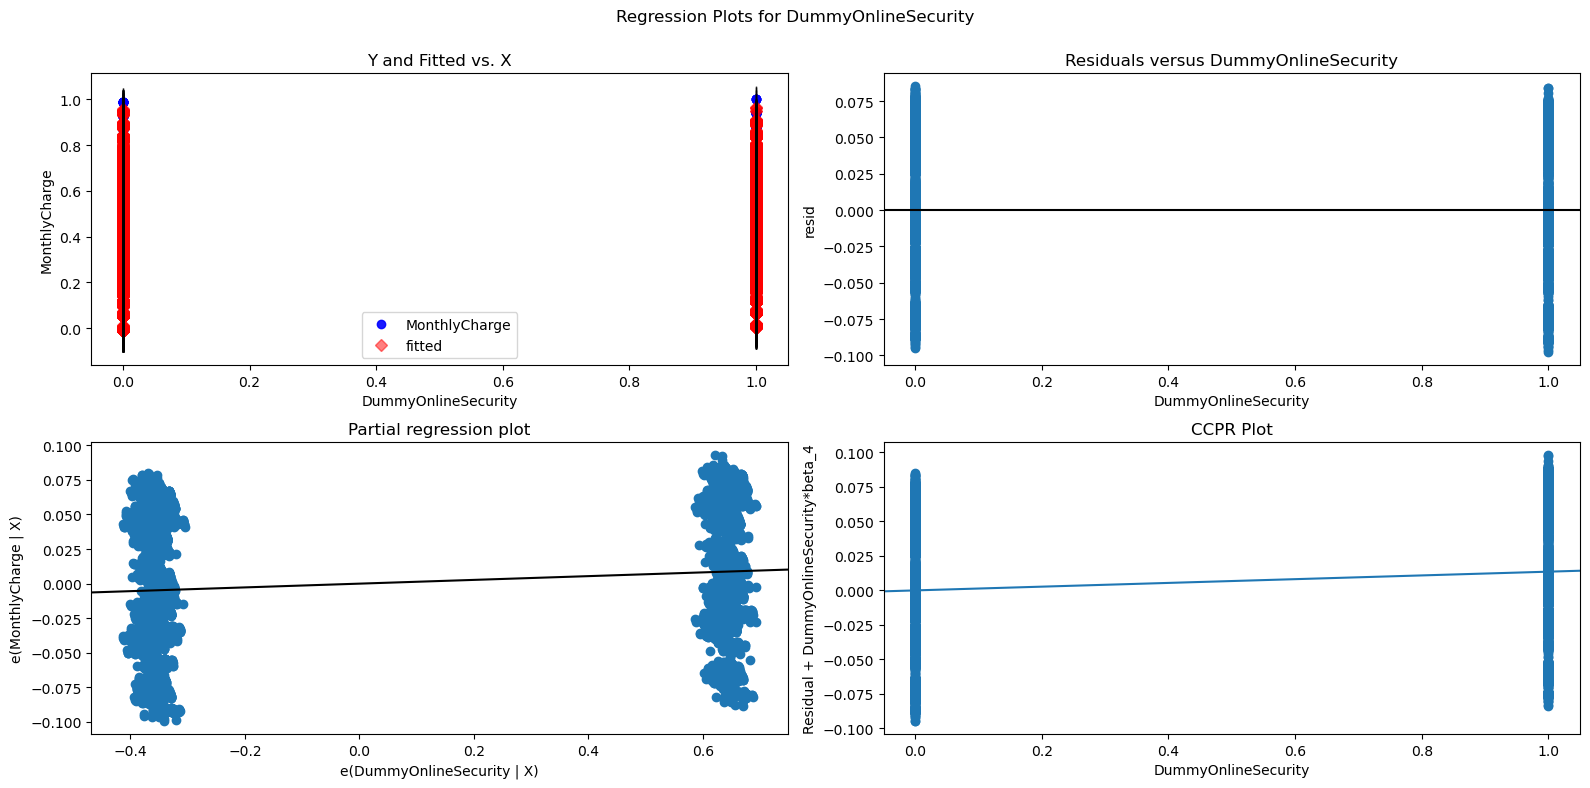

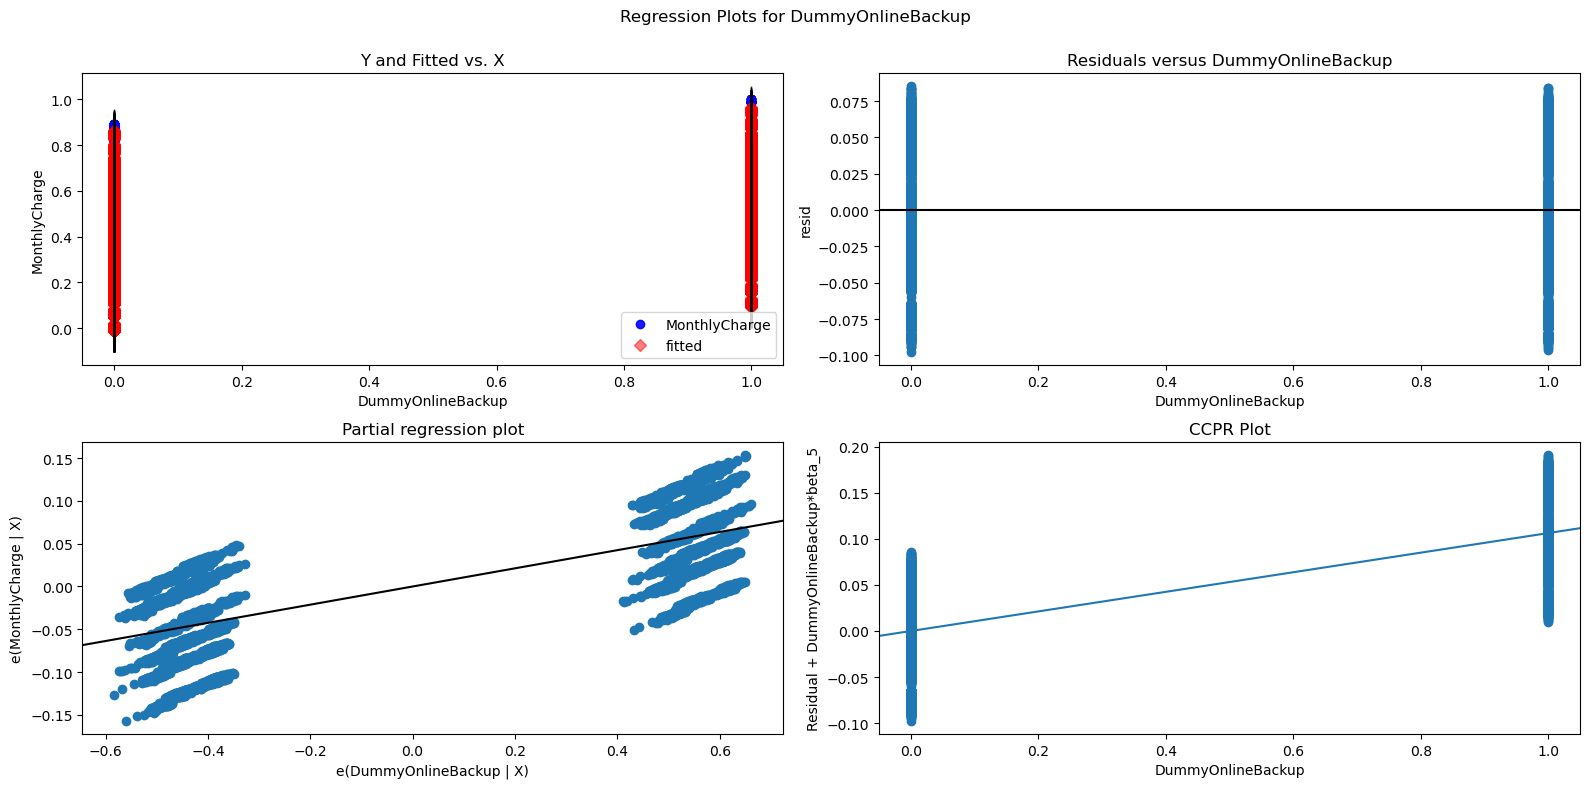

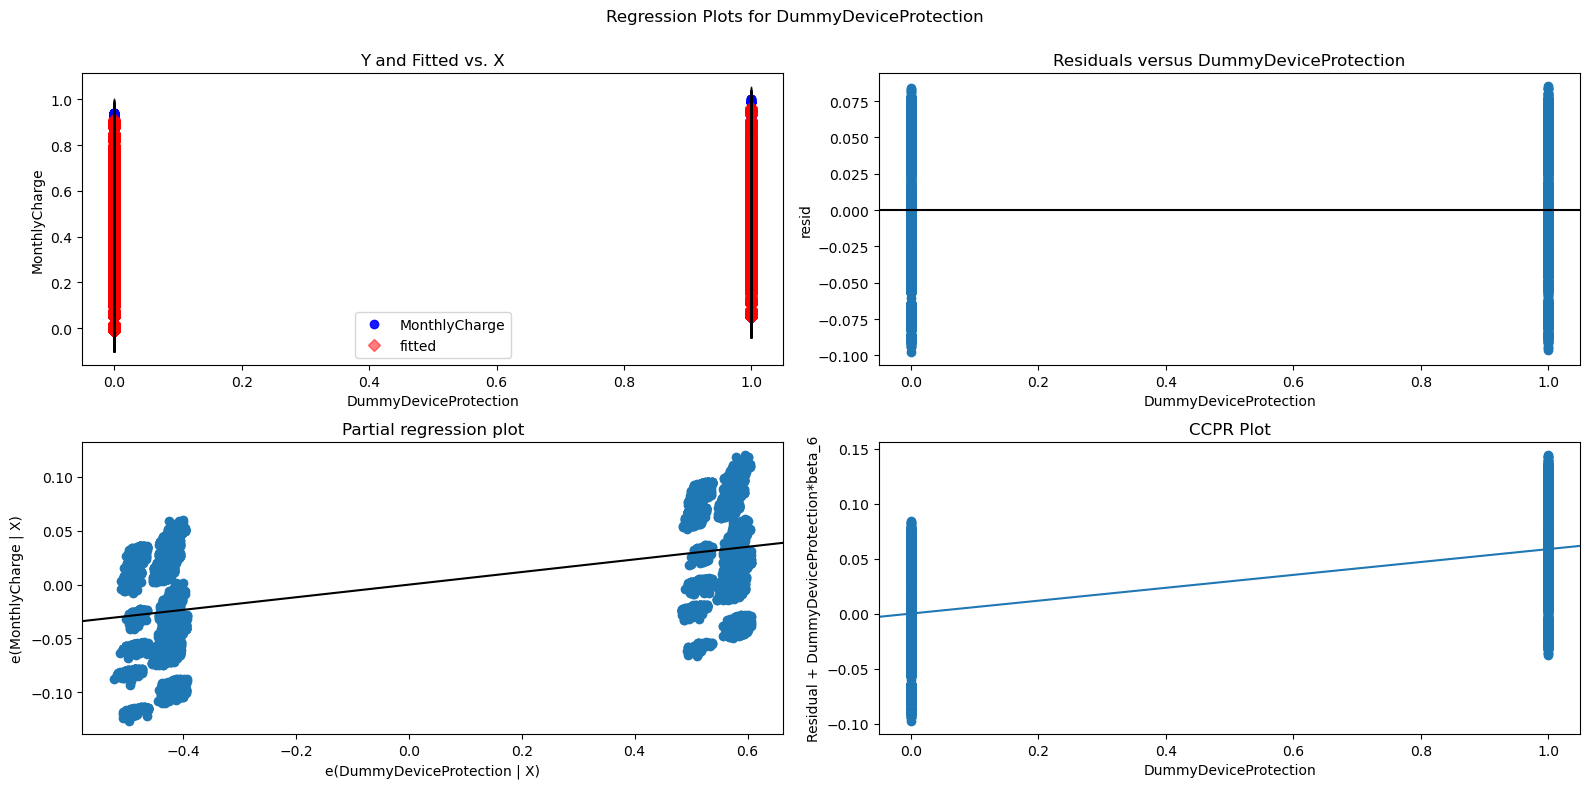

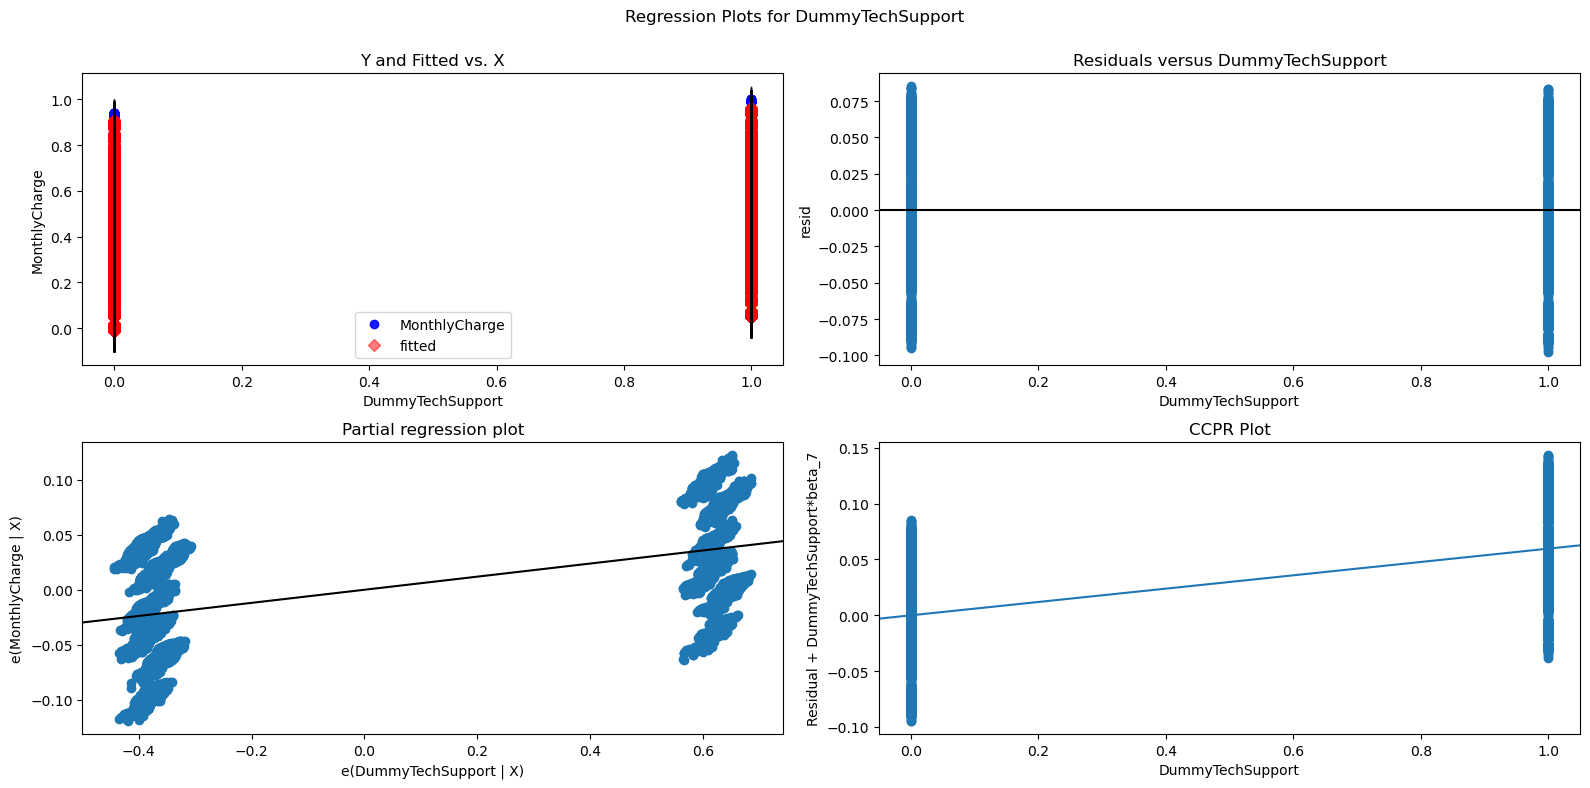

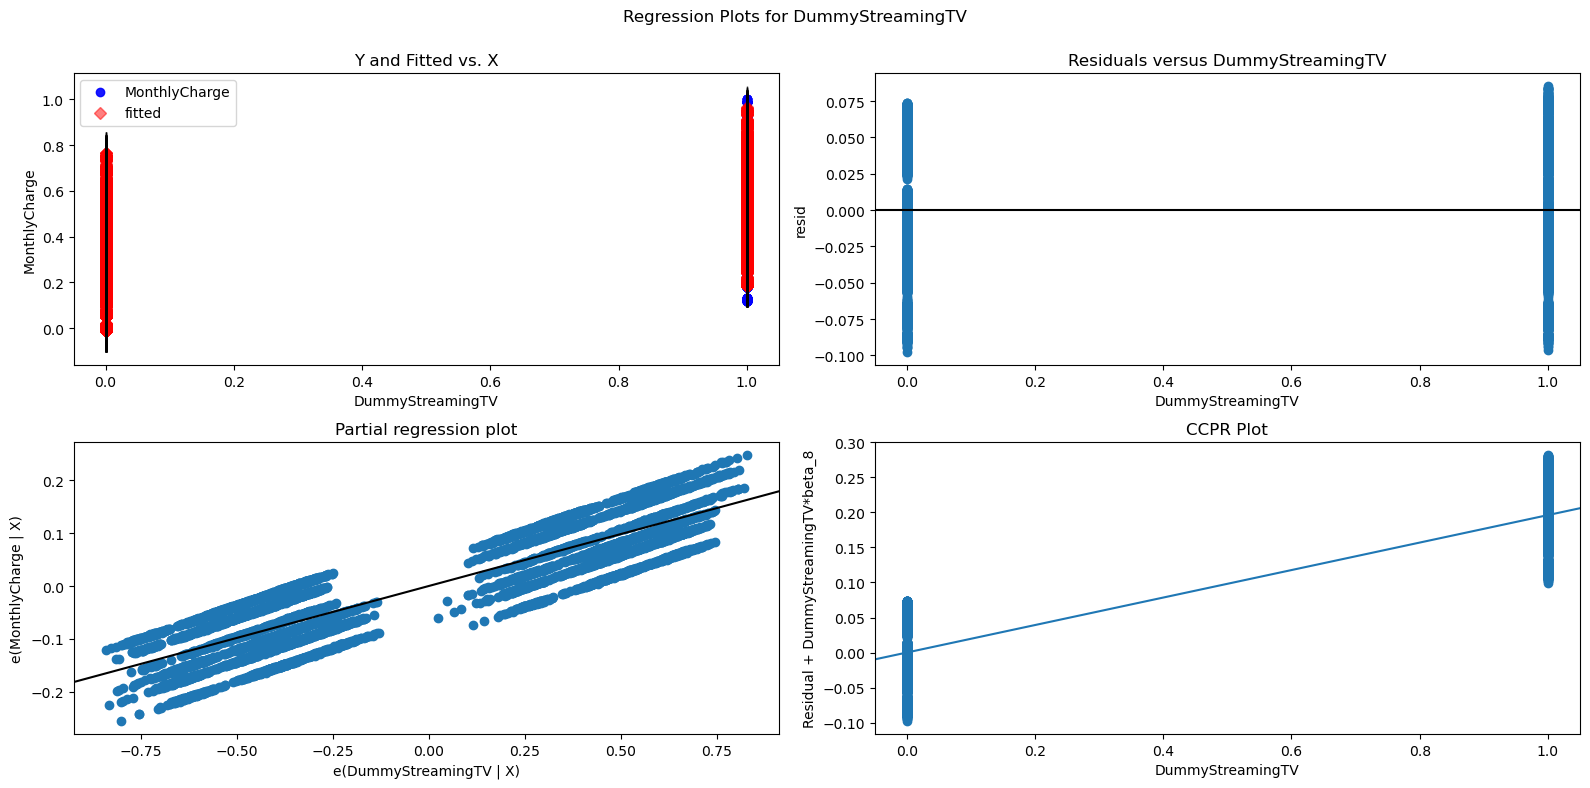

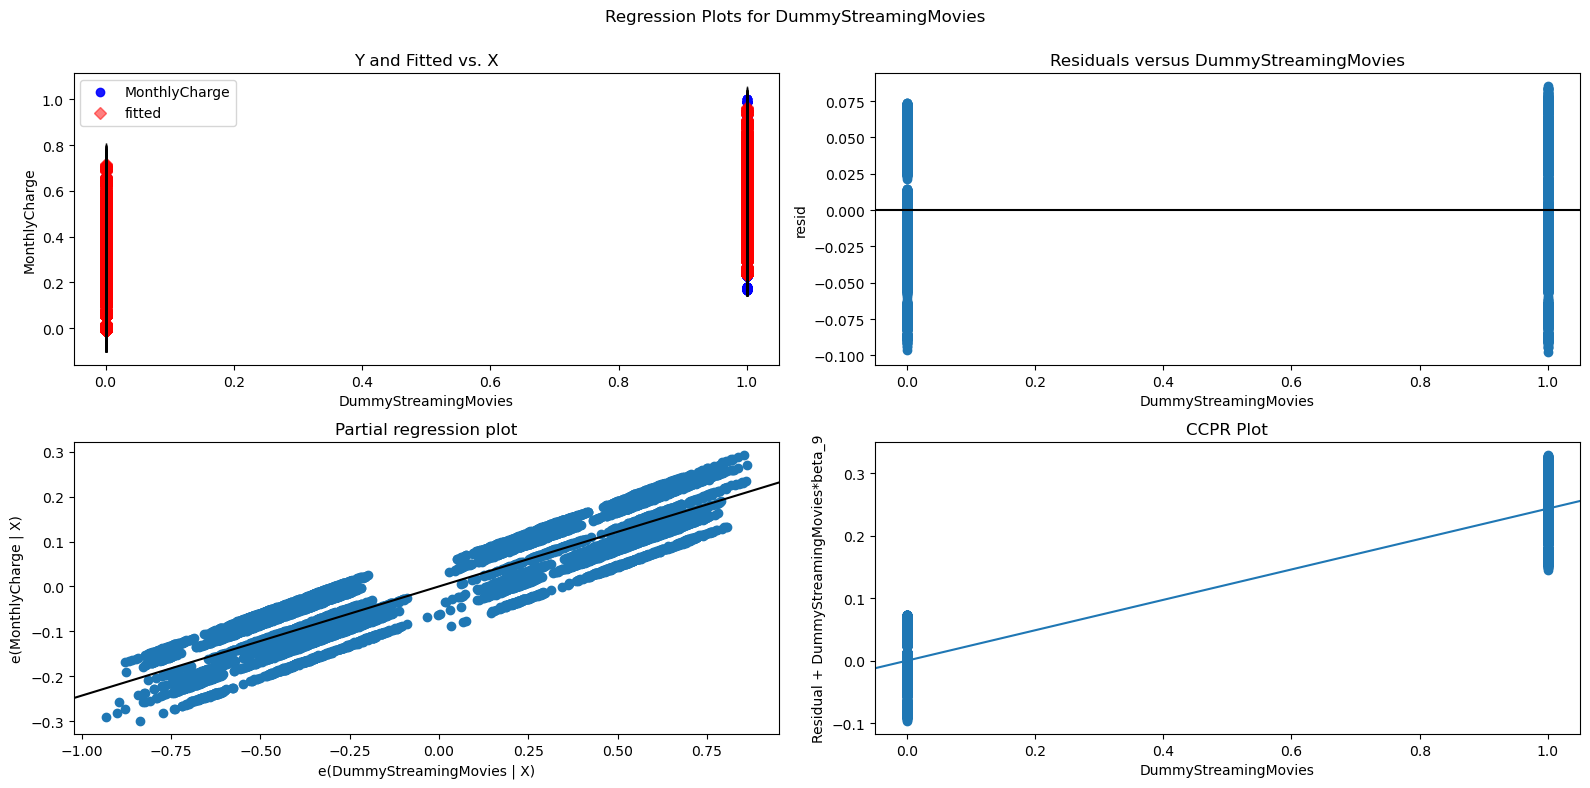

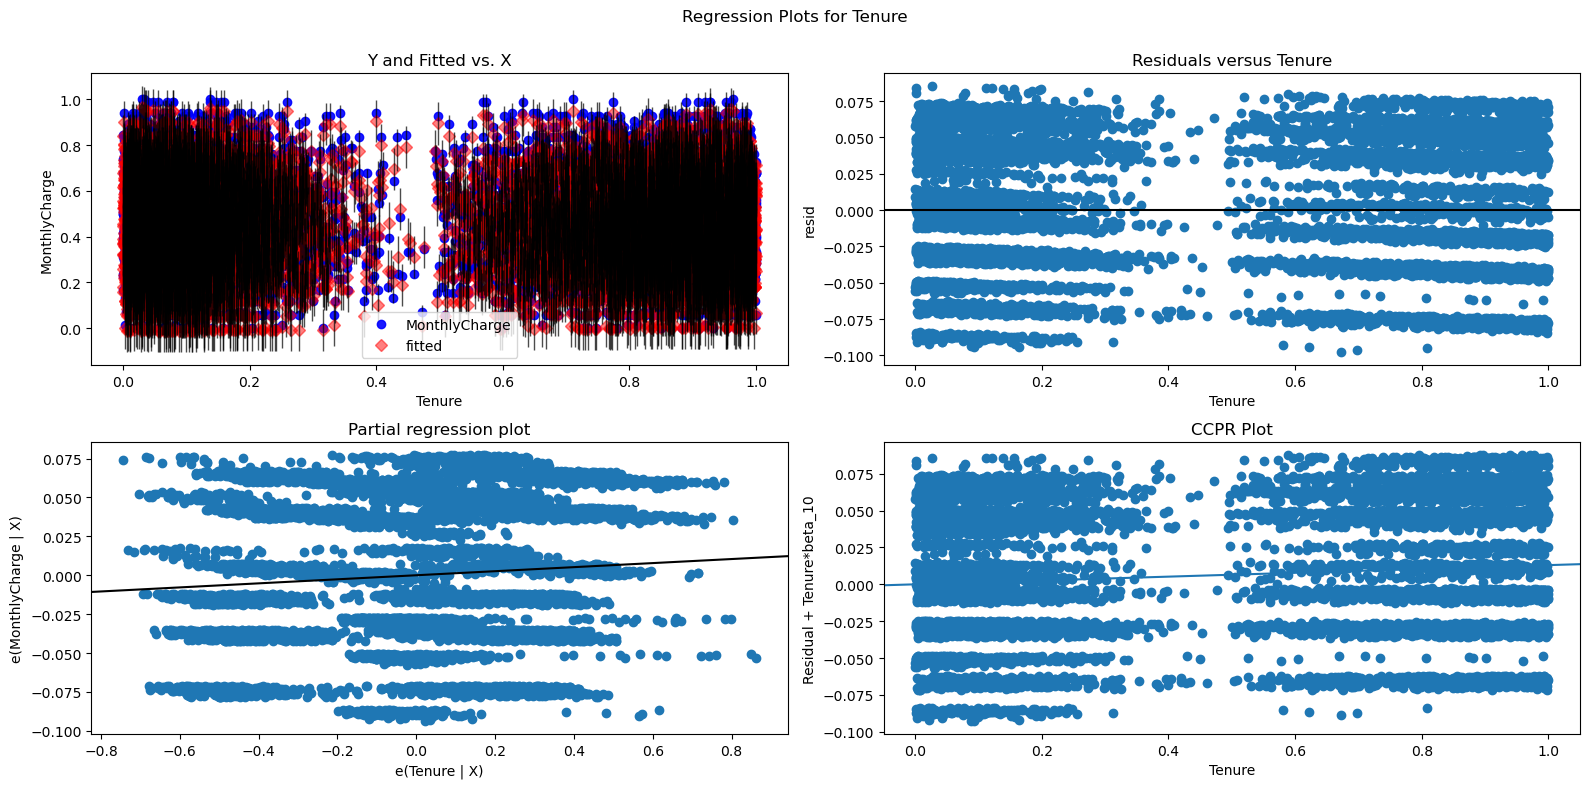

In [33]:
# Residual plot for churn
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'DummyChurn', fig=fig);

# Residual plot for contract
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'DummyContract', fig=fig);

# Residual plot for internet service
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'DummyInternetService', fig=fig);

# Residual plot for multiple services
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'DummyMultiple', fig=fig);

# Residual plot for online security
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'DummyOnlineSecurity', fig=fig);

# Residual plot for online backup
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'DummyOnlineBackup', fig=fig);

# Residual plot for device protection
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'DummyDeviceProtection', fig=fig);

# Residual plot for tech support
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'DummyTechSupport', fig=fig);

# Residual plot for streaming TV
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'DummyStreamingTV', fig=fig);

# Residual plot for streaming movies
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'DummyStreamingMovies', fig=fig);

# Residual plot for tenure
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Tenure', fig=fig);